In [1]:
import pickle
import numpy as np
import scipy.interpolate as spi
import matplotlib.pyplot as plt
%matplotlib inline

import flayer
import particle_evolution
import feo_thermodynamics as feot
import multiprocessing
import bulk_case_runner

# We have some annoying warnings - I think from llvm bug - fix then remove this
#import warnings
#warnings.filterwarnings("ignore")

In [2]:
base_parameters = {'f_layer_thickness': 200.0E3,
                    'delta_t_icb': 10.0,
                    'xfe_outer_core': 0.92,
                    'xfe_icb': 0.92,
                    'growth_prefactor': 150.0,
                    'chemical_diffusivity': 1.0E-9,
                    'kinematic_viscosity': 1.0E-6,
                    'i0': 1.0E-10,
                    'surf_energy': 1.08E-2, 
                    'number_of_analysis_points': 200,
                    'r_icb': 1221.5E3, 
                    'r_cmb': 3480.0E3,
                    'gruneisen_parameter': 1.5}

# Just runs in serial
data = bulk_case_runner.run_flayer_case(base_parameters, "cases/base_case.pickle")
print("Done, inner core growth rate is", data["growth_rate"], "km/Myr")
print("Max vf_ratio is", data["vf_ratio"].max())


Done, inner core growth rate is 16.15632934419563 km/Myr
Max vf_ratio is 9.820868684020741e-05


In [ ]:
# Bunch of cases, four at a time

cases = []

for dl in [5.0E-8, 1.0E-8, 5.0E-9, 5.0E-10, 1.0E-10, 5.0E-11]:
    name = f"cases/{dl:.3e}_dl_case"
    input_parameters = dict(base_parameters)
    input_parameters["chemical_diffusivity"] = dl
    cases.append((name, input_parameters))
    
for i0 in [1.0E-8, 1.0E-9, 1.0E-11, 1.0E-12]:
    name = f"cases/{i0:.3e}_i0_case"
    input_parameters = dict(base_parameters)
    input_parameters["i0"] = i0
    cases.append((name, input_parameters)) 

for gamma in [1.08, 1.08E-1, 1.08E-3, 1.08E-4]:
    name = f"cases/{gamma:.3e}_gamma_case"
    input_parameters = dict(base_parameters)
    input_parameters["i0"] = gamma
    cases.append((name, input_parameters))
    
for mu in [1.0E-4, 1.0E-5, 1.0E-7, 1.0E-8]:
    name = f"cases/{mu:.3e}_mu_case"
    input_parameters = dict(base_parameters)
    input_parameters["kinematic_viscosity"] = mu
    cases.append((name, input_parameters))   
    
for k0 in [10.0, 50.0, 100.0, 200.0]:
    name = f"cases/{k0:.3e}_k0_case"
    input_parameters = dict(base_parameters)
    input_parameters["growth_prefactor"] = k0
    cases.append((name, input_parameters))
    
with multiprocessing.Pool(processes=4) as pool:
    pool.map(bulk_case_runner.case_handler, cases)

In [ ]:
import glob

bulk_case_runner.plot_case_setup(**bulk_case_runner.load_case_data("cases/base_case.pickle"))

for file in glob.glob("cases/*.pickle"):
    print(file)
    data_from_file = bulk_case_runner.load_case_data(file)
    print(f"growth rate {data_from_file['growth_rate']} km/Myr max vf_ratio {data_from_file['vf_ratio'].max()}")
    # Crystal density and nucleation
    bulk_case_runner.plot_case_csd_nuc(**data_from_file)
    bulk_case_runner.plot_case_csd_nuc(**data_from_file, logscale=True)

    bulk_case_runner.plot_case_solid_frac(**data_from_file)
    # Plot P-T-R for reference. This is slow
    # Plot solution from 'middle' of layer
    try:
        bulk_case_runner.plot_case_single_solution(100, data_from_file)
    except Exception as err:
        print(f"{file} midpoint details failed! Exception was {err}")
    print()

In [ ]:
bulk_case_runner.load_case_data("cases/1.080e-04_gamma_case.pickle")
bulk_case_runner.plot_case_single_solution(190, data_from_file)

Temperature at CMB is 4091.0000127665962 K
Temberature at top of F-layer is 5495.375594101565 K
Temberature at ICB is 5560.445773134292 K


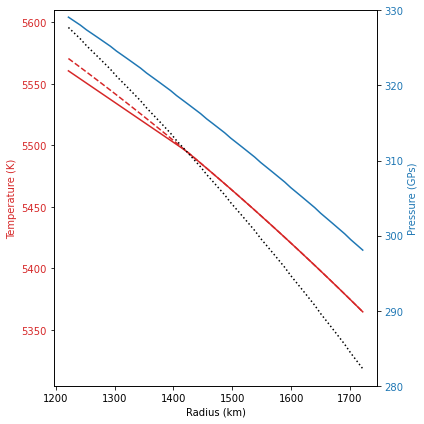

Radius 1.1119558537406584e+20 m capped to 10 m in falling
Radius 1.1119558537406584e+20 m capped to 10 m in falling
Radius 7.3636863751470146e+19 m capped to 10 m in falling
Radius 7.3636863751470146e+19 m capped to 10 m in falling
Radius 4.87518860146451e+19 m capped to 10 m in falling
Radius 4.87518860146451e+19 m capped to 10 m in falling
Radius 2.0668698457180176e+19 m capped to 10 m in falling
Radius 2.0668698457180176e+19 m capped to 10 m in falling
Radius 8.762823043327691e+18 m capped to 10 m in falling
Radius 8.762823043327691e+18 m capped to 10 m in falling
Radius 5.800476838690844e+18 m capped to 10 m in falling
Radius 5.800476838690844e+18 m capped to 10 m in falling
Radius 2.459203988352266e+18 m capped to 10 m in falling
Radius 2.459203988352266e+18 m capped to 10 m in falling
Radius 1.0426184635556064e+18 m capped to 10 m in falling
Radius 1.0426184635556064e+18 m capped to 10 m in falling
Radius 4.420346034600863e+17 m capped to 10 m in falling
Radius 4.420346034600863e

KeyboardInterrupt: 

In [2]:
base_parameters = {'f_layer_thickness': 200.0E3,
                    'delta_t_icb': 10.0,
                    'xfe_outer_core': 0.92,
                    'xfe_icb': 0.92,
                    'growth_prefactor': 150.0,
                    'chemical_diffusivity': 1.0E-9,
                    'kinematic_viscosity': 1.0E-6,
                    'i0': 1.0E20,
                    'surf_energy': 1.08E-2, 
                    'number_of_analysis_points': 200,
                    'r_icb': 1221.5E3, 
                    'r_cmb': 3480.0E3,
                    'gruneisen_parameter': 1.5,
                    'verbose' : False}

# Just runs in serial
bulk_case_runner.plot_case_setup(**base_parameters)

data = bulk_case_runner.run_flayer_case(base_parameters, "cases/testcase.pickle")
print("Done, inner core growth rate is", data["growth_rate"], "km/Myr")
print("Max vf_ratio is", data["vf_ratio"].max())

In [ ]:
base_parameters = {'f_layer_thickness': 200.0E3,
                    'delta_t_icb': 10.0,
                    'xfe_outer_core': 0.95,
                    'xfe_icb': 0.95,
                    'growth_prefactor': 150.0,
                    'chemical_diffusivity': 1.0E-9,
                    'kinematic_viscosity': 1.0E-6,
                    'i0': 1.0E-40,
                    'surf_energy': 1.08, 
                    'number_of_analysis_points': 200,
                    'r_icb': 1221.5E3, 
                    'r_cmb': 3480.0E3,
                    'gruneisen_parameter': 1.5,
                    'verbose' : True}

# Just runs in serial
bulk_case_runner.plot_case_setup(**base_parameters)

data = bulk_case_runner.run_flayer_case(base_parameters, "cases/testcase.pickle")
print("Done, inner core growth rate is", data["growth_rate"], "km/Myr")
print("Max vf_ratio is", data["vf_ratio"].max())

In [ ]:
data_from_file = bulk_case_runner.load_case_data("cases/testcase.pickle")
#bulk_case_runner.plot_case_csd_nuc(**data_from_file)
#bulk_case_runner.plot_case_csd_nuc(**data_from_file, logscale=True)

bulk_case_runner.plot_case_solid_frac(**data_from_file)